# CME 241 Assignment 6

## Shaan Patel

### Question 1

The utility function is given by $U(x) = x - \frac{\alpha x^2}{2}$, so:

$$ E[U(x)] = E[x - \frac{\alpha x^2}{2}] = E[x] - E[\frac{\alpha x^2}{2}] $$
$$ = \mu - \frac{\alpha}{2}E[x^2] $$
$$ = \mu - \frac{\alpha}{2}(Var(x) + E[x]^2) $$
$$ = \mu - \frac{\alpha}{2}(\sigma^2 + \mu^2) $$

Given this, we now can find the certainty equivalent via the Absolute Risk Premium.

$$ \pi_A = \frac{1}{2} A(\mu)\sigma_x^2 $$

$$ U'(x) = 1 - \alpha x $$
$$ U''(x) = - \alpha $$
Therefore,
$$A(\mu) = \frac{-U''(\mu)}{U'(\mu)} $$
$$ = \frac{\alpha}{1 - \alpha \mu} $$

$$\pi_A = \frac{\alpha}{2(1 - \alpha \mu)} \sigma_x^2 $$

We also know that $\pi_A = \mu - x_{CE} $, so 

$$ \frac{\alpha}{2(1 - \alpha \mu)} \sigma_x^2 = \mu - x_{CE} $$

That means that

$$ x_{CE} = \mu - \frac{\alpha}{2(1 - \alpha \mu)} \sigma_x^2 $$

For part b, we want to maximize the expected utility of the overall investment. Thus, we want to find $E[P]$ where $P$ is the portfolio. Because the risky and riskless assets are independent, we can split this utility function into the utility of the risky asset and the utility of the riskless asset.

$$E[P] = E[U(zx)] + E[U((1000000 - z)r)] $$

By investing $z$ dollars into the risky asset, we are essentially creating $z$ instances of the random return $x$. Thus we want the utility of $z$ times the random return $x$. A similar logic applies to the riskless asset.

We already found the expected utility of the risky asset from before and so we multiply the argument by $z$ to get the following:

$$ E[P] = (\mu z - \frac{\alpha z^2}{2}(\sigma^2 + \mu^2)) + E[U((1000000 - z)r)] $$

The riskless asset has no variation, so the expected utility is just the utility of $r$.

$$ E[P] = \mu z - \frac{\alpha z^2}{2}(\sigma^2 + \mu^2) + (1000000 - z)r - \frac{\alpha (1000000 - z)^2 r^2}{2} $$

We now want to find $z$ such that the utility is maximized. This is done simply by taking the derivative with respect to $z$ and setting it to 0 to find the maximum.

$$0 = \mu - \alpha z(\sigma^2 + \mu^2) - r + \alpha (1000000 - z)r^2 $$

$$0 = \mu - r + 1000000\alpha r^2 - \alpha z(\sigma^2 + \mu^2) - \alpha z r^2 $$

$$0 = \mu - r + 1000000\alpha r^2 - \alpha z(\sigma^2 + \mu^2 - r^2) $$

We now have our maximum value of $z$:

$$z = \frac{\mu - r + 1000000 \alpha r^2}{\alpha(\sigma^2 + \mu^2 - r^2)} $$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

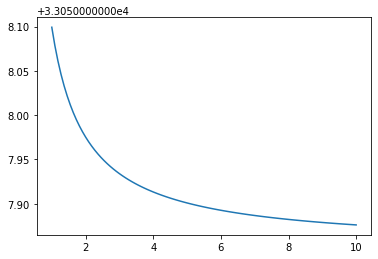

In [2]:
mu = 0.5
r = 0.2
s = 1

alpha = np.linspace(1,10,100)
z = [0.0]*len(alpha)
for i in range(len(alpha)):
    z[i] = (mu - r + 1000000*alpha[i]*r**2)/(alpha[i]*(s**2 + mu**2 - r**2))

plt.plot(alpha,z)

### Question 3

At the end of the single bet with starting wealth $W_0$, the two outcomes are $fW_0 (1 + \alpha)$ and $fW_0 (1 - \beta)$

Given this, the two outcomes for the utility of $W$ are $\log(fW_0(1 + \alpha) + (1-f)W_0)$ and $\log(fW_0(1 - \beta) + (1-f)W_0)$

As a result, the expected value of the utility is:

$$E[U(W)] = E[\log(W)]$$
$$ = p \log(fW_0(1 + \alpha) + (1-f)W_0) + q \log(fW_0(1 - \beta) + (1-f)W_0) $$
$$ = p \log(fW_0\alpha + W_0) + q \log(-fW_0\beta + W_0) $$

Derivative with respect to $f$ gives:

$$ 0 = \frac{p\alpha}{f\alpha + 1} + \frac{\beta(p-1)}{1 - f\beta} $$

This simplifies to:

$$0 = \frac{p\alpha(1 - f\beta) + \beta(p-1)(f\alpha + 1)}{(f\alpha + 1)(1 - f\beta)} $$
$$0 = \frac{p\alpha - pf\alpha\beta + pf\alpha\beta + p\beta - f\alpha\beta - \beta}{f\alpha - f^2\alpha\beta + 1 - f\beta} $$
$$ = \frac{p\alpha + p\beta - f\alpha\beta - \beta}{f\alpha - f^2\alpha\beta + 1 - f\beta} $$

This implies that the optimal $f^*$ is 

$$f\alpha\beta = p(\alpha + \beta) - \beta$$
$$f^* = \frac{p(\alpha + \beta) - \beta}{\alpha\beta} $$

If we rewrite this value, we get
$$ f^* = \frac{\alpha p - \beta (1 - p)}{\alpha \beta} $$

This makes intuitive sense as the numerator is the expected return of the bet and so the optimal fraction is this expected return discounted by the return of each outcome.

The second derivative with respect to $f$ gives:

$$ \frac{-\alpha^2p}{(f\alpha + 1)^2} + \frac{\beta^2(p - 1)}{(1 - f\beta)^2} $$

Substituting our $f^*$ gives:

$$ \frac{-\alpha^2p\beta^2}{p^2(\alpha + \beta)^2} + \frac{\beta^2(p-1)\alpha^2}{(1 - p)^2(\alpha + \beta)^2} $$

$$ = \frac{-\alpha^2\beta^2(p(1 - p)^2 + p^2(1 - p))}{p^2(1-p)^2(\alpha + \beta)^2} $$

$$ = \frac{-\alpha^2\beta^2p(1-p)}{p^2(1-p)^2(\alpha + \beta)^2} $$

As we can see, the denominator is all squares, so it will be positive for all values of $p$, $\alpha$, and $\beta$. In the numerator, we know that the probability $p$ will always between 0 and 1. Thus, both $p$ and $1-p$ will both be positive and $\alpha^2$ and $\beta^2$ will also be positive because they are squared real numbers. As a result, the negative sign causes the entire second derivative to be negative for $f^*$, indicating that this value is indeed a maximum.